# TensorFlow 2.0

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

## Hyperparameter Tunning

In [3]:
num_epochs = 100
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32,32,3)
num_classes = 10

## Build Model

In [4]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [5]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

## Data Preprocess

In [6]:
train_paths = glob('../dataset/cifar/train/*.png')
test_paths = glob('../dataset/cifar/test/*.png')

In [7]:
sample = train_paths[0]
sample

'../dataset/cifar/train\\0_frog.png'

In [8]:
def get_label_name(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    return lbl_name

In [9]:
classes = [get_label_name(path) for path in train_paths]

In [10]:
class_names = tf.unique(classes).y.numpy()

In [11]:
class_names

array([b'frog', b'automobile', b'ship', b'cat', b'deer', b'airplane',
       b'truck', b'dog', b'bird', b'horse'], dtype=object)

In [12]:
def onehot_encoding(path) : 
    onehot = tf.cast(get_label_name(path) == class_names, tf.uint8)
    return onehot

In [13]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    image = tf.cast(image, tf.float32)/255.
    label = onehot_encoding(path)
    return image, label

In [14]:
get_label_name(sample) == class_names

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True, False, False, False, False, False, False, False, False,
       False])>

In [15]:
onehot_encoding(sample)

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)>

In [16]:
def image_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [17]:
image, label = load_image_label(sample)
image = image*255
image.shape, label.shape

(TensorShape([32, 32, 3]), TensorShape([10]))

In [18]:
trainsformed_image, label = image_preprocess(image, label)
trainsformed_image=trainsformed_image

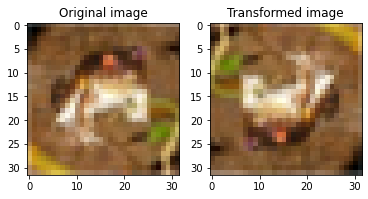

In [19]:
plt.subplot(121)
plt.title("Original image")
plt.imshow(image)

plt.subplot(122)
plt.title("Transformed image")
plt.imshow(trainsformed_image)
plt.show()

In [20]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(load_image_label)
train_dataset = train_dataset.map(image_preprocess) #transform image
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [21]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(load_image_label)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.shuffle(buffer_size=len(test_paths))
test_dataset = test_dataset.repeat()

## Training

In [22]:
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(test_paths) // batch_size

In [ ]:
model.fit_generator(
    train_dataset,
    steps_per_epoch = steps_per_epoch,
    validation_data = test_dataset,
    validation_steps = validation_steps,
    epochs = num_epochs,
)

C:\Users\jumin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1562/1562 [==============================] - 318s 157ms/step - loss: 2.3029 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 2/100
1562/1562 [==============================] - 242s 155ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 3/100
1562/1562 [==============================] - 243s 155ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 4/100
1562/1562 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.0989